In [1090]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
import warnings
warnings.filterwarnings('ignore')

## Reading and Analysing the Data

In [1091]:
data_train=pd.read_csv('C:/Users/Abhishek/Downloads/carInsurance_train.csv')

In [1092]:
data_test=pd.read_csv('C:/Users/Abhishek/Downloads/carInsurance_test.csv')

In [1093]:
data_train.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0


In [1094]:
data_train.shape

(4000, 19)

In [1095]:
data_test.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,4001,25,admin.,single,secondary,0,1,1,1,NaN,12,may,12,-1,0,NaN,17:17:42,17:18:06,NaN
1,4002,40,management,married,tertiary,0,0,1,1,cellular,24,jul,1,-1,0,NaN,09:13:44,09:14:37,NaN
2,4003,44,management,single,tertiary,0,-1313,1,1,cellular,15,may,10,-1,0,NaN,15:24:07,15:25:51,NaN
3,4004,27,services,single,secondary,0,6279,1,0,cellular,9,nov,1,-1,0,NaN,09:43:44,09:48:01,NaN
4,4005,53,technician,married,secondary,0,7984,1,0,cellular,2,feb,1,-1,0,NaN,16:31:51,16:34:22,NaN


In [1096]:
data_test.shape

(1000, 19)

In [1097]:
data_final=pd.concat([data_train,data_test],axis=0)

In [1098]:
data_final.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0.0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0.0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1.0
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1.0
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0.0


In [1099]:
data_final.shape

(5000, 19)

In [1100]:
data_final.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,5000.0,2500.5000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,41.2664,11.651428,18.0,32.00,39.0,49.00,95.0
Default,5000.0,0.0142,0.118326,0.0,0.00,0.0,0.00,1.0
Balance,5000.0,1506.0094,3358.730128,-3058.0,113.00,538.0,1615.25,98417.0
HHInsurance,5000.0,0.4968,0.500040,0.0,0.00,0.0,1.00,1.0
CarLoan,5000.0,0.1306,0.336996,0.0,0.00,0.0,0.00,1.0
LastContactDay,5000.0,15.6862,8.413839,1.0,8.00,16.0,22.00,31.0
NoOfContacts,5000.0,2.5874,2.973235,1.0,1.00,2.0,3.00,43.0
DaysPassed,5000.0,49.2958,107.152847,-1.0,-1.00,-1.0,-1.00,854.0
PrevAttempts,5000.0,0.7352,2.069961,0.0,0.00,0.0,0.00,58.0


In [1101]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                5000 non-null   int64  
 1   Age               5000 non-null   int64  
 2   Job               4976 non-null   object 
 3   Marital           5000 non-null   object 
 4   Education         4784 non-null   object 
 5   Default           5000 non-null   int64  
 6   Balance           5000 non-null   int64  
 7   HHInsurance       5000 non-null   int64  
 8   CarLoan           5000 non-null   int64  
 9   Communication     3877 non-null   object 
 10  LastContactDay    5000 non-null   int64  
 11  LastContactMonth  5000 non-null   object 
 12  NoOfContacts      5000 non-null   int64  
 13  DaysPassed        5000 non-null   int64  
 14  PrevAttempts      5000 non-null   int64  
 15  Outcome           1201 non-null   object 
 16  CallStart         5000 non-null   object 
 

In [1102]:
data_final.isnull().sum()

Id                     0
Age                    0
Job                   24
Marital                0
Education            216
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication       1123
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome             3799
CallStart              0
CallEnd                0
CarInsurance        1000
dtype: int64

In [1103]:
data_final.columns

Index(['Id', 'Age', 'Job', 'Marital', 'Education', 'Default', 'Balance',
       'HHInsurance', 'CarLoan', 'Communication', 'LastContactDay',
       'LastContactMonth', 'NoOfContacts', 'DaysPassed', 'PrevAttempts',
       'Outcome', 'CallStart', 'CallEnd', 'CarInsurance'],
      dtype='object')

In [1104]:
data_final.corr()

,Id,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
Id,1.000000,0.009291,-0.001931,-0.017094,0.011585,-0.014993,-0.017696,-0.003105,0.014125,0.019420,-0.017864
Age,0.009291,1.000000,-0.004050,0.087753,-0.182377,-0.018593,0.016128,0.018279,-0.009774,0.014811,0.039158
Default,-0.001931,-0.004050,1.000000,-0.056292,0.002459,0.114014,0.011710,0.022343,-0.013758,-0.028748,-0.039506
Balance,-0.017094,0.087753,-0.056292,1.000000,-0.075793,-0.083901,0.007725,-0.009262,0.003609,0.012897,0.041561
HHInsurance,0.011585,-0.182377,0.002459,-0.075793,1.000000,0.079049,-0.022277,-0.011989,0.077391,0.020054,-0.203419
CarLoan,-0.014993,-0.018593,0.114014,-0.083901,0.079049,1.000000,0.015444,0.019252,-0.041898,-0.023539,-0.092131
LastContactDay,-0.017696,0.016128,0.011710,0.007725,-0.022277,0.015444,1.000000,0.144971,-0.074961,-0.071895,-0.061271
NoOfContacts,-0.003105,0.018279,0.022343,-0.009262,-0.011989,0.019252,0.144971,1.000000,-0.102470,-0.062935,-0.114884
DaysPassed,0.014125,-0.009774,-0.013758,0.003609,0.077391,-0.041898,-0.074961,-0.102470,1.000000,0.503369,0.138943
PrevAttempts,0.019420,0.014811,-0.028748,0.012897,0.020054,-0.023539,-0.071895,-0.062935,0.503369,1.000000,0.148763


## Unvariate and Bivariate Analysis

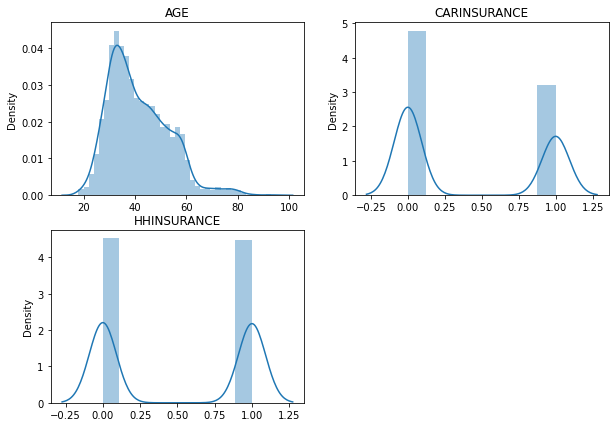

In [1105]:
# Distribution plot

plt.figure(figsize=(10,7))

plt.subplot(2,2,1)
sns.distplot(x=data_final['Age']) 
plt.title('AGE')

plt.subplot(2,2,2)
sns.distplot(x=data_final['CarInsurance'])
plt.title('CARINSURANCE')

plt.subplot(2,2,3)
sns.distplot(x=data_final['HHInsurance'])
plt.title('HHINSURANCE')

plt.show()

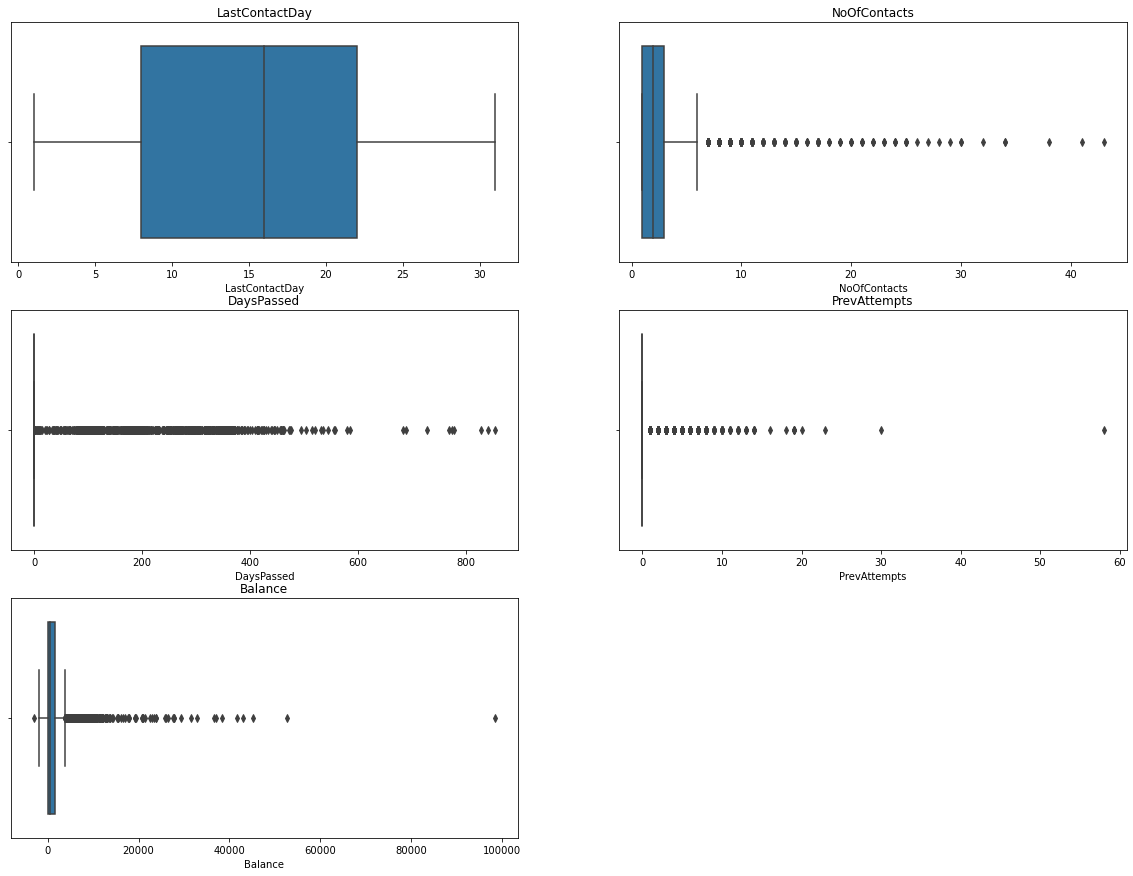

In [1106]:
# Box Plot

plt.figure(figsize=(20,15))

plt.subplot(3,2,1)
sns.boxplot(data_final['LastContactDay'])
plt.title('LastContactDay')

plt.subplot(3,2,2)
sns.boxplot(data_final['NoOfContacts'])
plt.title('NoOfContacts')

plt.subplot(3,2,3)
sns.boxplot(data_final['DaysPassed'])
plt.title('DaysPassed')

plt.subplot(3,2,4)
sns.boxplot(data_final['PrevAttempts'])
plt.title('PrevAttempts')

plt.subplot(3,2,5)
sns.boxplot(data_final['Balance'])
plt.title('Balance')

plt.show()

## Treating the Missing Values

In [1107]:
((data_final.isnull().sum()/data_final.isnull().count())*100).sort_values(ascending=False)

Outcome             75.98
Communication       22.46
CarInsurance        20.00
Education            4.32
Job                  0.48
Marital              0.00
Default              0.00
Balance              0.00
HHInsurance          0.00
CarLoan              0.00
Age                  0.00
LastContactDay       0.00
LastContactMonth     0.00
NoOfContacts         0.00
DaysPassed           0.00
PrevAttempts         0.00
CallStart            0.00
CallEnd              0.00
Id                   0.00
dtype: float64

In [1108]:
data_final['Job'].value_counts()

management       1114
blue-collar       937
technician        823
admin.            586
services          414
retired           326
self-employed     182
unemployed        164
student           158
entrepreneur      149
housemaid         123
Name: Job, dtype: int64

In [1109]:
data_final['Job'] = data_final['Job'].fillna('management')

In [1110]:
data_final['Education'].value_counts()

secondary    2489
tertiary     1601
primary       694
Name: Education, dtype: int64

In [1111]:
data_final['Education'] = data_final['Education'].fillna('secondary')

In [1112]:
data_final['Communication'].value_counts()

cellular     3529
telephone     348
Name: Communication, dtype: int64

In [1113]:
data_final['Communication'] = data_final['Communication'].fillna('cellular')

In [1114]:
del data_final['Outcome']

In [1115]:
data_final.isnull().sum()

Id                     0
Age                    0
Job                    0
Marital                0
Education              0
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication          0
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
CallStart              0
CallEnd                0
CarInsurance        1000
dtype: int64

In [1155]:
del data_train['Outcome']

In [1156]:
del data_test['Outcome']

## Treating the Outliers

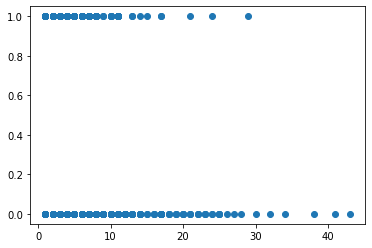

In [1116]:
plt.scatter(x=data_final['NoOfContacts'], y=data_final['CarInsurance'])
plt.show()

In [1117]:
data_final[data_final['NoOfContacts']>40]

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,CallStart,CallEnd,CarInsurance
3168,3169,33,blue-collar,married,secondary,0,0,1,1,cellular,31,jul,43,-1,0,17:56:12,17:56:28,0.0
3575,3576,28,blue-collar,single,secondary,0,623,0,0,cellular,18,jun,41,-1,0,10:27:24,10:27:49,0.0


In [1118]:
#data_final.drop(index=[3168,3575], inplace=True)

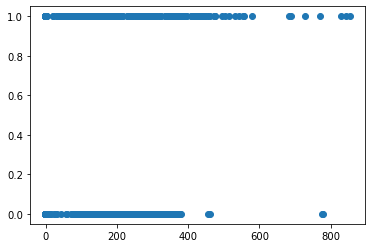

In [1119]:
plt.scatter(x=data_final['DaysPassed'], y=data_final['CarInsurance'])
plt.show()

In [1120]:
data_final[data_final['DaysPassed']>800]

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,CallStart,CallEnd,CarInsurance
618,619,34,blue-collar,married,secondary,0,320,1,0,cellular,12,aug,1,828,2,13:57:22,14:03:14,1.0
1958,1959,31,housemaid,married,secondary,0,243,1,0,cellular,23,sep,2,842,1,16:27:00,16:32:05,1.0
3590,3591,37,management,divorced,tertiary,0,488,1,0,cellular,17,sep,1,854,2,10:43:12,10:48:40,1.0


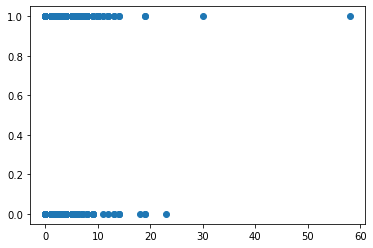

In [1121]:
plt.scatter(x=data_final['PrevAttempts'], y=data_final['CarInsurance'])
plt.show()

In [1122]:
data_final[data_final['PrevAttempts']>30]

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,CallStart,CallEnd,CarInsurance
2354,2355,46,blue-collar,married,primary,0,1085,1,1,cellular,15,may,2,353,58,15:05:29,15:14:12,1.0


In [1123]:
data_final.drop(index=[2354], inplace=True)

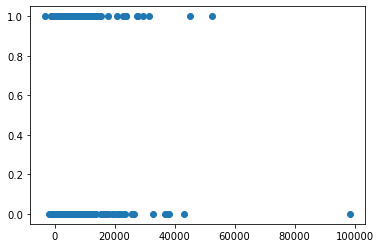

In [1124]:
plt.scatter(x=data_final['Balance'], y=data_final['CarInsurance'])
plt.show()

In [1125]:
data_final[data_final['Balance']>80000]

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,CallStart,CallEnd,CarInsurance
1742,1743,59,management,married,tertiary,0,98417,0,0,telephone,20,nov,5,-1,0,10:51:42,10:54:07,0.0


In [1126]:
data_final.drop(index=[1742], inplace=True)

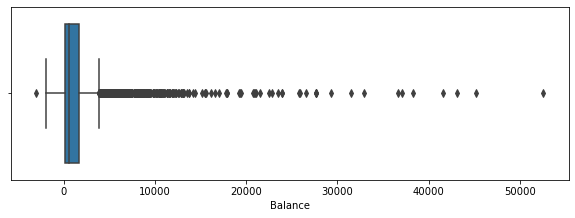

In [1127]:
plt.figure(figsize=(10,7))
plt.subplot(2,1,1)
sns.boxplot(data_final['Balance'])
plt.show()

In [1128]:
data_final.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,13:45:20,13:46:30,0.0
1,2,32,blue-collar,married,primary,0,1156,1,0,cellular,26,may,5,-1,0,14:49:03,14:52:08,0.0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,16:30:24,16:36:04,1.0
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,12:06:43,12:20:22,1.0
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,14:35:44,14:38:56,0.0


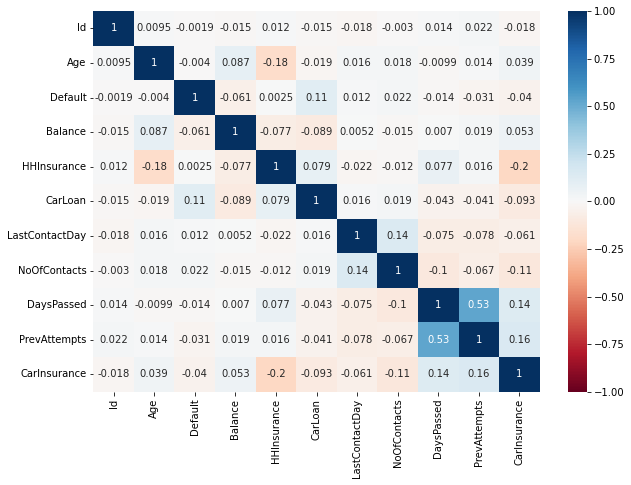

In [1129]:
plt.figure(figsize=(10,7))
sns.heatmap(data_final.corr(), annot=True, vmax=1, vmin=-1, cmap='RdBu')
plt.show()

## Feature Selection

In [1130]:
data_final.drop(columns=['Id','Default','CallStart','CallEnd'], inplace=True)

In [1131]:
data_test.drop(columns=['Id','Default','CallStart','CallEnd'], inplace=True)

In [1132]:
data_train.drop(columns=['Id','Default','CallStart','CallEnd'], inplace=True)

In [1133]:
data_final.head()

,Age,Job,Marital,Education,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
0,32,management,single,tertiary,1218,1,0,telephone,28,jan,2,-1,0,0.0
1,32,blue-collar,married,primary,1156,1,0,cellular,26,may,5,-1,0,0.0
2,29,management,single,tertiary,637,1,0,cellular,3,jun,1,119,1,1.0
3,25,student,single,primary,373,1,0,cellular,11,may,2,-1,0,1.0
4,30,management,married,tertiary,2694,0,0,cellular,3,jun,1,-1,0,0.0


## Feature Engineering

In [1134]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [1135]:
data_final['NoOfContacts']=le.fit_transform(data_final['NoOfContacts'])

In [1136]:
data_final['Job']=le.fit_transform(data_final['Job']) 

In [1145]:
data_final['Marital']=le.fit_transform(data_final['Marital'])

In [1146]:
data_final['Education']=le.fit_transform(data_final['Education'])

In [1147]:
data_final['Communication']=le.fit_transform(data_final['Communication'])

In [1149]:
data_train['CarInsurance']=le.fit_transform(data_train['CarInsurance'])

In [1159]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in ['Marital','Education','Communication','LastContactMonth','Job' ]:
    data_train[col] = le.fit_transform(data_train[col])
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in ['Marital','Education','Communication','LastContactMonth','Job']:
    data_test[col] = le.fit_transform(data_test[col])
le = LabelEncoder()
for col in ['Marital','Education','Communication','LastContactMonth','Job']:
    data_final[col] = le.fit_transform(data_final[col]) 

In [1160]:
data_test.head()

,Age,Job,Marital,Education,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
0,25,0,2,1,1,1,1,2,12,8,12,-1,0,NaN
1,40,4,1,2,0,1,1,0,24,5,1,-1,0,NaN
2,44,4,2,2,-1313,1,1,0,15,8,10,-1,0,NaN
3,27,7,2,1,6279,1,0,0,9,9,1,-1,0,NaN
4,53,9,1,1,7984,1,0,0,2,3,1,-1,0,NaN


In [1161]:
data_test.dtypes

Age                   int64
Job                   int64
Marital               int64
Education             int64
Balance               int64
HHInsurance           int64
CarLoan               int64
Communication         int64
LastContactDay        int64
LastContactMonth      int64
NoOfContacts          int64
DaysPassed            int64
PrevAttempts          int64
CarInsurance        float64
dtype: object

In [1162]:
data_final.dtypes

Age                   int64
Job                   int64
Marital               int64
Education             int64
Balance               int64
HHInsurance           int64
CarLoan               int64
Communication         int64
LastContactDay        int64
LastContactMonth      int32
NoOfContacts          int64
DaysPassed            int64
PrevAttempts          int64
CarInsurance        float64
dtype: object

# Train Test Split

In [1163]:
x = data_train.drop(columns=['CarInsurance'])
y = data_train['CarInsurance']

In [1164]:
from sklearn.model_selection import train_test_split

In [1165]:
x_train, x_test, y_train, y_test = train_test_split(x,y, stratify=y,train_size=0.9, random_state=2)

In [1173]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3600, 13) (400, 13) (3600,) (400,)


# Logistic Rregression Model

In [1168]:
from sklearn.linear_model import LogisticRegression

In [1169]:
model_lr= LogisticRegression()

In [1170]:
model_lr.fit(x_train,y_train)

LogisticRegression()

In [1171]:
y_pred = model_lr.predict(x_test)

In [1172]:
pd.DataFrame({"Actual":y_test,'Predicted':y_pred})

,Actual,Predicted
1812,0,0
2560,0,0
960,0,0
3084,1,0
2809,0,0
...,...,...
3009,0,0
2229,0,0
1479,0,0
2963,0,0


In [1174]:
y_pred_soft = model_lr.predict_proba(x_test)

In [1175]:
y_pred_soft[:,1]

array([0.06765736, 0.22055065, 0.45550904, 0.46907414, 0.28694751,
       0.439172  , 0.45681817, 0.3507813 , 0.42690016, 0.47984997,
       0.55395104, 0.52370504, 0.07126668, 0.42962842, 0.31136558,
       0.30625593, 0.30319279, 0.31204297, 0.48162316, 0.47115744,
       0.29595814, 0.58268047, 0.47971342, 0.35144943, 0.46327779,
       0.27484513, 0.78200401, 0.58758714, 0.34501213, 0.56706621,
       0.23243525, 0.44290178, 0.39756365, 0.38861126, 0.43212807,
       0.4668838 , 0.3787837 , 0.40755855, 0.55357619, 0.57100675,
       0.47636748, 0.37454838, 0.07171093, 0.30492549, 0.49644156,
       0.54367384, 0.29723355, 0.63343175, 0.40260131, 0.4860237 ,
       0.46453472, 0.2904334 , 0.43181486, 0.53062596, 0.51592113,
       0.48406275, 0.39412649, 0.49633192, 0.48959066, 0.39618955,
       0.48954273, 0.43681477, 0.26060774, 0.48099983, 0.50138577,
       0.30572285, 0.48328868, 0.50959141, 0.37166206, 0.28546429,
       0.53391753, 0.40798669, 0.50626005, 0.33566918, 0.42844

In [1176]:
pd.DataFrame({"Actual":y_test,'Predicted':y_pred,'Soft Pred':y_pred_soft[:,1]}).head(15)

,Actual,Predicted,Soft Pred
1812,0,0,0.067657
2560,0,0,0.220551
960,0,0,0.455509
3084,1,0,0.469074
2809,0,0,0.286948
1825,1,0,0.439172
1583,0,0,0.456818
3336,0,0,0.350781
2930,1,0,0.426900
1689,1,0,0.479850


# Validation

In [1177]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, confusion_matrix

In [1178]:
def validation(test, pred):
    print('Confusion Matrix\n',confusion_matrix(test,pred))
    print('Accuracy: ',accuracy_score(test,pred))
    print('Recall: ',recall_score(test,pred))
    print('Precision: ',precision_score(test,pred))
    print('F1 Score: ',f1_score(test, pred))

In [1179]:
validation(y_test,y_pred)

Confusion Matrix
 [[212  28]
 [107  53]]
Accuracy:  0.6625
Recall:  0.33125
Precision:  0.654320987654321
F1 Score:  0.4398340248962655


In [1180]:
model_lr.score(x_test,y_test)

0.6625

# ROC Curve

In [1181]:
from sklearn.metrics import roc_auc_score, roc_curve

In [1182]:
auc = roc_auc_score(y_test, y_pred)

In [1183]:
auc

0.6072916666666667

In [1184]:
fpr,tpr,threshold= roc_curve(y_test,y_pred_soft[:,1])

In [1185]:
pd.DataFrame({'FPR':fpr,'TPR':tpr,'Threshold':threshold})

,FPR,TPR,Threshold
0,0.000000,0.00000,1.782004
1,0.000000,0.00625,0.782004
2,0.000000,0.03125,0.663729
3,0.004167,0.03125,0.654441
4,0.004167,0.04375,0.636911
...,...,...,...
167,0.891667,0.98750,0.253044
168,0.891667,0.99375,0.250991
169,0.987500,0.99375,0.106606
170,0.987500,1.00000,0.071711


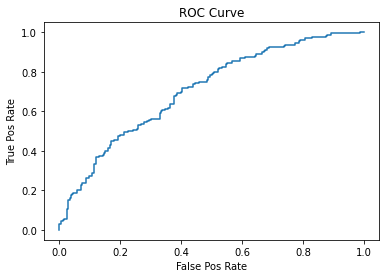

Area under the curve:  0.6072916666666667


In [1186]:
plt.plot(fpr,tpr)
plt.title('ROC Curve')
plt.xlabel('False Pos Rate')
plt.ylabel('True Pos Rate')
plt.show()
print('Area under the curve: ',auc)

In [1187]:
# Changing the threshold or classifier cutoff

In [1190]:
thres = 0.50
y_pred_50 = (y_pred_soft[:,1]>thres).astype(int)

In [1191]:
y_pred_50

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,

In [1192]:
validation(y_test,y_pred_50)

Confusion Matrix
 [[212  28]
 [107  53]]
Accuracy:  0.6625
Recall:  0.33125
Precision:  0.654320987654321
F1 Score:  0.4398340248962655
